<a href="https://colab.research.google.com/github/megalphian/learning_ml/blob/master/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.__version__

'2.6.0+cu124'

In [2]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.item()

7

In [4]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [5]:
from torch import nn
import matplotlib.pyplot as plt

In [6]:
# Create a straight line with known parameters
# We will create a neural network to predict this

weight = 0.7
bias = 0.3

start=0
end=1
step=0.02

X = torch.arange(start,end,step).unsqueeze(1)
y = weight * X + bias

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

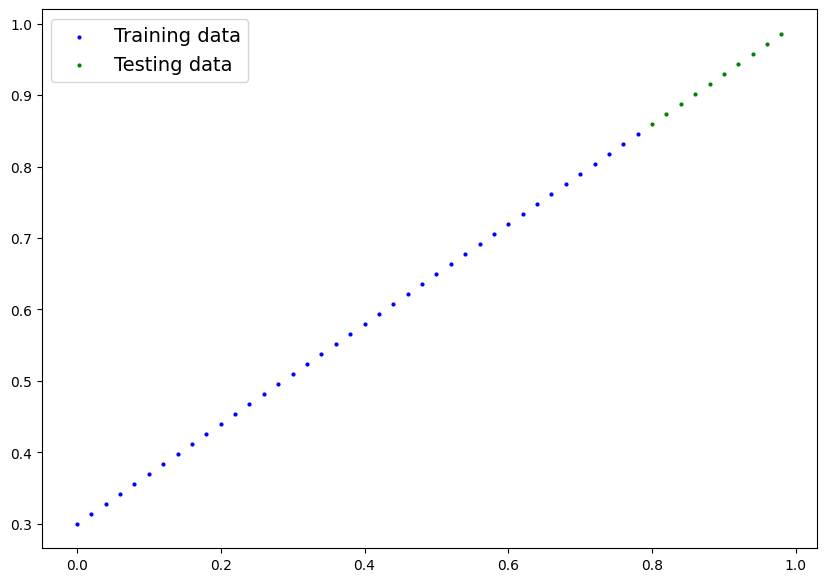

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions(X_train, y_train, X_test, y_test)

In [9]:
class LinearRegressionNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [26]:
torch.manual_seed(42)

model_0 = LinearRegressionNN()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [28]:
# Define a loss function and an optimizer for training the parameters

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [49]:
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  # Put the model in training mode, so that the gradients of the parameters are computed
  model_0.train()

  # Predict the y values using the model in train mode
  y_pred = model_0(X_train)

  # Compute the loss function using the predictions and the ground truth outputs
  loss = loss_fn(y_pred, y_train)

  # Zero out the gradients of the optimizer to prepare for backpropogation
  optimizer.zero_grad()

  # Conduct backprop to compute the gradients of the paramters according to the loss function
  loss.backward()

  # Step the optimizer to change the values of the parameters whose gradients were computed in the previous step
  optimizer.step()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())

      print(f"Epoch: {epoch}, MAE Train loss: {loss}, Test loss: {test_loss}")


Epoch: 0, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882
Epoch: 10, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882
Epoch: 20, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882
Epoch: 30, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882
Epoch: 40, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882
Epoch: 50, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882
Epoch: 60, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882
Epoch: 70, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882
Epoch: 80, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882
Epoch: 90, MAE Train loss: 0.008932482451200485, Test loss: 0.005023092031478882


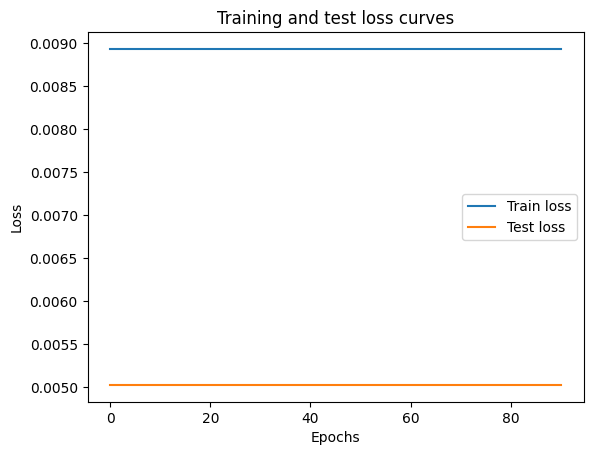

In [50]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [51]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [52]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

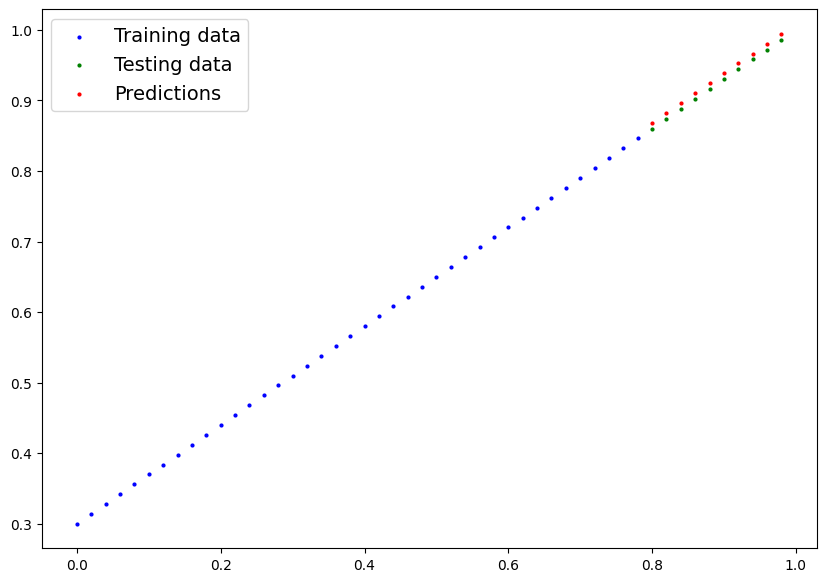

In [53]:
plot_predictions(predictions=y_preds)